In [54]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [55]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(7,7))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

def wiener_filter(img, kernel, K):
    kernel /= np.sum(kernel)
    dummy = np.copy(img)
    dummy = fft2(dummy)
    kernel = fft2(kernel, s = img.shape)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
    return dummy

def gaussian_kernel(kernel_size = 3):
    h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    return h

    

True

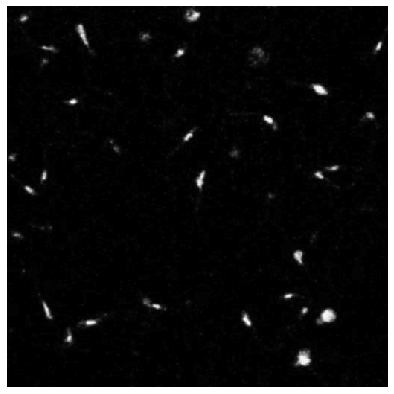

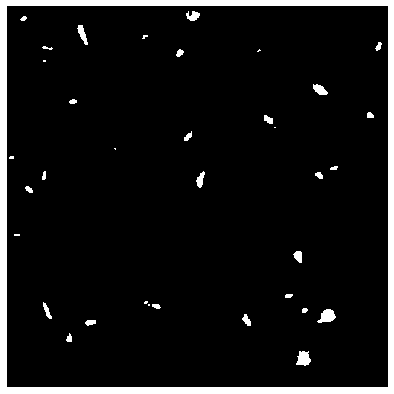

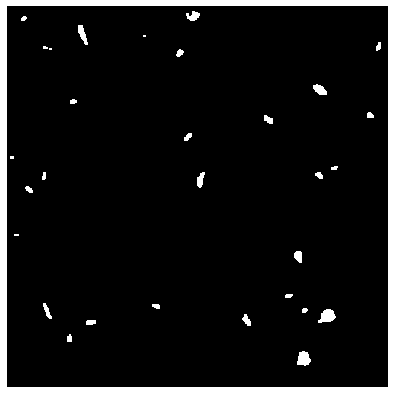

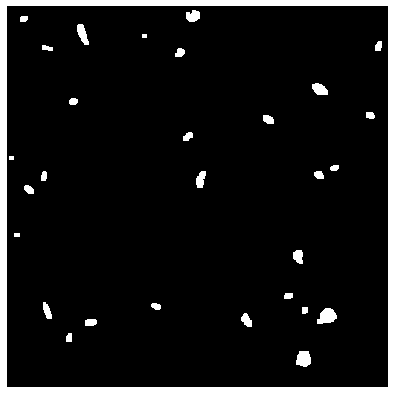

In [68]:
image = cv2.imread('images/sample.jpg')
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_show(image_bw)


_, image_tresh = cv2.threshold(image_bw,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
image_show(image_tresh)


image_steched = cv2.morphologyEx(image_tresh, cv2.MORPH_OPEN, np.ones((3,3),np.uint8))
image_show(image_steched)

image_dilated = cv2.dilate(image_steched, np.ones((3,3),np.uint8), iterations = 1)
image_show(image_dilated)

test_image_bw_segmented = image_dilated

cv2.imwrite('imagenes_salida/original.jpg', image_bw)
cv2.imwrite('imagenes_salida/otsu.jpg', image_tresh)
cv2.imwrite('imagenes_salida/contracted.jpg', image_steched)
cv2.imwrite('imagenes_salida/dilaten.jpg', image_dilated)




In [64]:
image_dilated

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [65]:
!ls

Segmentation_2.0.ipynb images                 test_segmentation.py
Untitled.ipynb         segmentation.py


In [66]:
!pwd

/Users/leonardodelossantos/Desktop/FING/Proyecto/Proyecto-/development/segmentation


In [67]:
!mkdir imagenes_salida